# Unit 5 - Financial Planning


In [16]:
# Initial imports
import os
import requests
import pandas as pd
import datetime as datetime
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [17]:
# Load .env enviroment variables
load_dotenv()

True

In [18]:
def get_workday(date):
    date = pd.to_datetime(date)
    offset = max(1, (date.weekday() + 6) % 7 - 3)
    timedelta = datetime.timedelta(offset)
    return pd.Timestamp((date - timedelta).date(),tz="America/New_York").isoformat()

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [19]:
# Set current amount of crypto assets
# YOUR CODE HERE!
crypto_port = {
    "BTC" : 1.2,
    "ETH" : 5.3
}

In [20]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [21]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = requests.get(btc_url).json()["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
# YOUR CODE HERE!]
eth_price = requests.get(btc_url).json()["data"]["1"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc = crypto_port["BTC"]
my_eth = crypto_port["ETH"]

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13726.96
The current value of your 5.3 ETH is $60627.39


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [22]:
# Current amount of shares
# YOUR CODE HERE!
my_spy = 50
my_agg = 200

In [23]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [24]:
# Format current date as ISO format
# YOUR CODE HERE!
today = get_workday("today")
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-10-12 00:00:00-04:00  117.85  117.94  117.77  117.93  2770157  349.59   

                                                             
                             high     low   close    volume  
2020-10-12 00:00:00-04:00  354.02  349.06  352.43  61163344

In [25]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:,.2f}")
print(f"Current SPY closing price: ${spy_close_price:,.2f}")

Current AGG closing price: $117.93
Current SPY closing price: $352.43


In [28]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $17,621.50
The current value of your 200 AGG shares is $23,586.00


### Savings Health Analysis

In [29]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
savings = {
    "amount" : [my_btc_value + my_eth_value,
               my_agg_value + my_spy_value]
}
savings_type = ["crypto", "shares"]
df_savings = pd.DataFrame(savings, index=savings_type)
# Display savings DataFrame
display(df_savings)

amount
crypto  74354.345
shares  41207.500

In [30]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Personal Savings")

In [31]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings.sum())

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")
else:
    savings_needed = emergency_fund - total_savings
    print(f"You need to save ${savings_needed:,.2f} to reach your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [32]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
end_date = get_workday("today")
five_yrs = datetime.timedelta(days=(365*5))
start_date = pd.to_datetime("today") - five_yrs
start_date = get_workday((pd.to_datetime("today") - five_yrs).date())

print(end_date)
print(start_date)

2020-10-12T00:00:00-04:00
2015-10-14T00:00:00-04:00


In [33]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562   

                              SPY                                      
                             open    high       low   close    volume  
2015-10-14 00:00:00-04:00  200.18  200.87  198.9400  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.6400  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.9200  203.14  79323870  
2015-10-19 00:00:00-04:00  202.50  203.37  202.1300  203.33  61255929  
2015-10-20 00:00:00-04:00  202.85  203.84  202.5471  203.07  60081395

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
weight = [.4, .6]
num_sims = 500
num_days = 252 * 30

MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weight,
    num_simulation = num_sims,
    num_trading_days = num_days
)

In [37]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.87  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279

In [38]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1          2          3         4         5    \
0      1.000000  1.000000   1.000000   1.000000  1.000000  1.000000   
1      1.009664  0.996177   1.012020   0.999601  1.005573  1.007652   
2      1.005274  0.998407   1.003700   0.986083  0.998226  1.005740   
3      1.004686  0.990368   1.008490   0.976977  0.998236  1.018126   
4      1.009759  0.979581   1.012198   0.988981  1.002928  1.018012   
...         ...       ...        ...        ...       ...       ...   
7556  15.543397  8.749209  13.567853  13.010781  6.315255  6.897597   
7557  15.548881  8.851442  13.613510  13.097597  6.366096  6.813830   
7558  15.547585  8.679464  13.670824  13.239331  6.466334  6.851726   
7559  15.465349  8.751344  13.718694  13.199633  6.427063  6.882538   
7560  15.499094  8.782480  13.582750  13.081962  6.445792  6.867047   

            6          7          8          9    ...        490       491  \
0      1.000000   1.000000   1.000000   1.000000  ...   1.000000  1.000000   
1      1.004547   1.002291   0.999319   1.010619  ...   1.004628  0.985827   
2      1.009841   1.001507   0.993929   1.015843  ...   0.988473  0.982693   
3      1.000912   1.008006   0.995349   1.012241  ...   0.975631  0.995003   
4      0.979531   1.001947   0.983889   1.016257  ...   0.972755  1.000376   
...         ...        ...        ...        ...  ...        ...       ...   
7556  26.087057  23.792104  52.521121  13.122439  ...  13.858607  7.617564   
7557  26.528750  23.836958  52.414624  13.194736  ...  13.782907  7.635889   
7558  26.641289  24.166813  52.212649  13.353746  ...  13.873388  7.691483   
7559  26.676230  24.087627  52.486497  13.521259  ...  13.867339  7.711376   
7560  27.049015  23.869752  52.850705  13.570427  ...  13.782071  7.657766   

            492        493        494       495        496       497  \
0      1.000000   1.000000   1.000000  1.000000   1.000000  1.000000   
1      0.999744   0.998520   0.994432  1.000360   1.002828  0.993794   
2      1.000487   0.995247   0.990825  0.995174   0.988129  0.992405   
3      0.984339   1.001076   0.993252  1.001625   0.983220  0.994936   
4      0.988186   1.006153   1.000720  1.009121   0.978674  0.988910   
...         ...        ...        ...       ...        ...       ...   
7556  14.213002  29.770101  10.593690  6.612957  22.502163  7.896284   
7557  14.067433  30.122478  10.628889  6.669498  22.666600  7.990900   
7558  14.013009  30.065495  10.580467  6.732346  22.578982  7.968673   
7559  14.045691  30.070406  10.559682  6.765373  22.597992  8.046706   
7560  14.006713  29.830330  10.462789  6.704033  22.361505  8.011428   

           498       499  
0     1.000000  1.000000  
1     1.005025  1.011787  
2     1.004059  1.007295  
3     1.001946  1.007709  
4     1.021966  1.001194  
...        ...       ...  
7556  4.875035  8.671003  
7557  4.882673  8.644751  
7558  4.856646  8.649258  
7559  4.906595  8.630255  
7560  4.851153  8.639986  

[7561 rows x 500 columns]

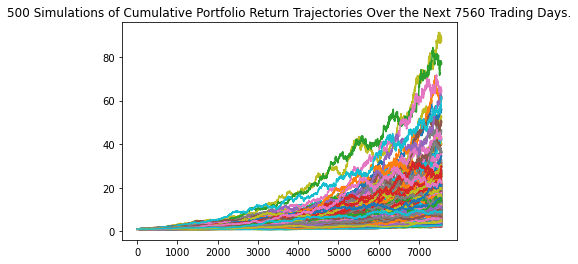

In [41]:
# Plot simulation outcomes
# YOUR CODE HERE!
title = "500 Simulations of Cummulative Portfolio Return Trajectory Over the Next 30 Years"
line_plot = MC_30year.plot_simulation()

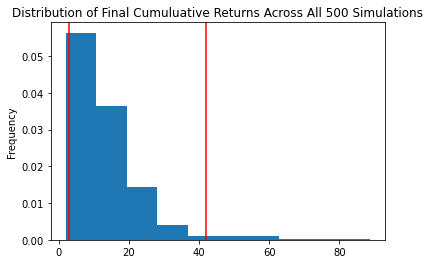

In [42]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_30year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             13.755270
std              10.585837
min               1.931711
25%               7.043788
50%              10.713403
75%              17.034144
max              88.810628
95% CI Lower      2.978512
95% CI Upper     42.048359
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = initial_investment * tbl[8]
ci_upper = initial_investment * tbl[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $59,570.25 and $840,967.18


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [48]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = initial_investment * tbl[8]
ci_upper = initial_investment * tbl[9]
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $89,355.37 and $1,261,450.77


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
weight = [.4, .6]
num_sims = 500
num_days = 252 * 5

MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weight,
    num_simulation = num_sims,
    num_trading_days = num_days
)

In [51]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.007164  1.000734  0.993870  1.001009  0.997200  1.007982  1.005519   
2     1.004138  1.004125  1.008902  0.994622  1.005384  1.005519  1.004421   
3     1.002274  1.008169  1.009775  0.989057  1.005020  1.006124  1.008027   
4     1.000226  0.998423  1.011877  0.992083  1.003458  0.992506  1.025004   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.459815  2.109758  1.492265  1.053624  1.348177  2.068296  2.099068   
1257  1.447888  2.098927  1.483430  1.049168  1.382891  2.057330  2.070030   
1258  1.445050  2.110132  1.475591  1.050932  1.391318  2.053251  2.068356   
1259  1.433859  2.104799  1.473061  1.051221  1.391882  2.034868  2.039857   
1260  1.445331  2.110699  1.483028  1.060165  1.417327  2.032338  2.078262   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.009356  1.006179  0.995065  ...  1.005411  0.984016  1.001224   
2     1.007350  1.006653  0.987683  ...  1.005626  0.978797  0.996395   
3     1.008225  0.996915  0.995990  ...  1.009072  0.988326  1.000214   
4     1.018353  1.000470  1.000976  ...  1.020749  0.987338  1.003104   
...        ...       ...       ...  ...       ...       ...       ...   
1256  0.862116  1.655394  3.804021  ...  1.868741  1.291337  1.407244   
1257  0.859669  1.658597  3.850747  ...  1.871315  1.284817  1.408507   
1258  0.857761  1.653153  3.878836  ...  1.875723  1.281659  1.407957   
1259  0.849819  1.667298  3.883214  ...  1.876391  1.262351  1.393141   
1260  0.855979  1.647586  3.858668  ...  1.910787  1.247303  1.413879   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.016476  0.998514  0.988963  1.004283  0.998365  0.999089  0.999097  
2     1.015669  1.001672  0.992637  0.996433  0.996632  1.000329  1.011567  
3     1.016024  1.005084  0.983111  0.998255  0.997979  0.989341  1.004023  
4     1.010354  1.007019  0.978646  1.001459  1.006647  0.988613  1.009116  
...        ...       ...       ...       ...       ...       ...       ...  
1256  0.958136  2.022090  1.216631  0.988789  1.949001  1.815068  1.717257  
1257  0.952372  2.015199  1.212950  0.992114  1.940142  1.796341  1.727408  
1258  0.957621  2.013944  1.225125  0.987969  1.920678  1.808339  1.724070  
1259  0.948204  2.015015  1.224047  1.000212  1.906583  1.793404  1.727301  
1260  0.950813  1.970059  1.205772  1.011819  1.918663  1.782269  1.722370  

[1261 rows x 500 columns]

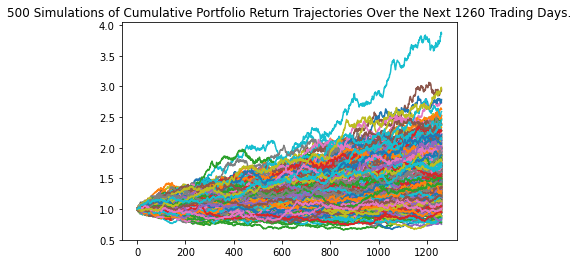

In [53]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_5year = MC_5year.plot_simulation()

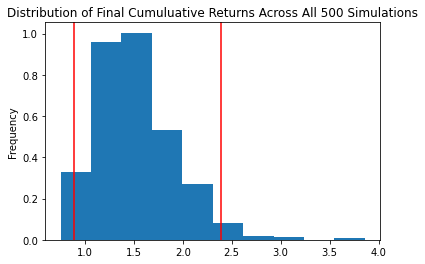

In [54]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_5year = MC_5year.plot_distribution()

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_5year = MC_5year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_5year)

count           500.000000
mean              1.517662
std               0.400890
min               0.752507
25%               1.243841
50%               1.451836
75%               1.737280
max               3.858668
95% CI Lower      0.886163
95% CI Upper      2.391845
Name: 1260, dtype: float64


In [57]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60_000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = initial_investment * tbl_5year[8]
ci_upper_five = initial_investment * tbl_5year[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 5 years will end within in the range of $53,169.76 and $143,510.68


### Ten Years Retirement Option

In [62]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
weight = [.4, .6]
num_sims = 500
num_days = 252 * 10

MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weight,
    num_simulation = num_sims,
    num_trading_days = num_days
)

In [64]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.991450  1.001693  1.012509  1.000587  1.005410  1.003018  0.981461   
2     0.999667  1.021455  1.010407  0.999923  1.005856  1.012680  0.983100   
3     0.981176  1.022061  1.010495  0.994790  1.004643  0.999353  0.984768   
4     0.989762  1.019566  1.003693  1.000754  0.999116  0.990603  0.982155   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.307918  2.689304  1.645855  1.567514  2.181248  2.171892  1.489604   
2517  1.298620  2.665144  1.631311  1.564802  2.171983  2.175072  1.485312   
2518  1.308632  2.649248  1.638481  1.558555  2.159617  2.166538  1.483353   
2519  1.320784  2.633869  1.614805  1.566204  2.135923  2.194780  1.461269   
2520  1.328289  2.615752  1.599033  1.558184  2.140392  2.218103  1.476999   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.005029  1.001339  1.006182  ...  1.000396  0.993995  0.993009   
2     1.005065  0.997660  1.021178  ...  0.994332  0.988080  0.991494   
3     1.003951  0.989677  1.044200  ...  0.997226  0.991022  0.995161   
4     1.003867  0.984863  1.047878  ...  0.995248  0.985996  1.015803   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.703069  1.991556  2.637535  ...  1.376057  3.114763  2.396577   
2517  1.714494  1.987354  2.649000  ...  1.369023  3.110785  2.374954   
2518  1.720777  2.027798  2.602146  ...  1.356863  3.107234  2.365002   
2519  1.719725  2.034725  2.602479  ...  1.348410  3.131285  2.346778   
2520  1.719696  2.016821  2.585755  ...  1.355874  3.136501  2.354934   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.991653  0.991205  0.999508  0.994063  0.985300  0.990127  1.010688  
2     0.997281  1.003715  0.993901  0.987515  0.992017  0.988608  1.014194  
3     1.004905  1.003126  0.991139  0.977825  0.988391  0.991856  1.008957  
4     0.990651  0.996395  0.991005  0.978457  0.994327  1.000540  1.008807  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.169094  2.554229  3.010356  2.346157  2.106907  2.641529  3.180250  
2517  1.174002  2.564130  3.000631  2.329825  2.133717  2.640268  3.181912  
2518  1.165875  2.543454  3.011113  2.300703  2.122593  2.654762  3.183671  
2519  1.171109  2.543739  3.003237  2.313718  2.115973  2.664190  3.181787  
2520  1.169287  2.533442  2.970771  2.315701  2.110890  2.692256  3.180928  

[2521 rows x 500 columns]

In [65]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_10year = MC_10year.plot_simulation()

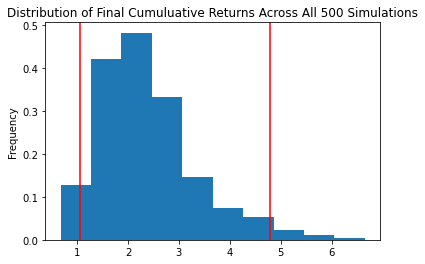

In [66]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_10year = MC_10year.plot_distribution()

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_10year = MC_10year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_10year)

count           500.000000
mean              2.382950
std               0.948438
min               0.675335
25%               1.724535
50%               2.218910
75%               2.861506
max               6.653923
95% CI Lower      1.055893
95% CI Upper      4.798483
Name: 2520, dtype: float64


In [70]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60_000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = initial_investment * tbl_10year[8]
ci_upper_ten = initial_investment * tbl_10year[9]
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 10 years will end within in the range of $63,353.60 and $287,908.96
